https://youtu.be/YAJ5XBwlN4o


1. Design model input size output size forward pass
2. Construct loss and optimizer
3. Training loop

- forward pass: compute prediction and loss
- backward pass: gradients
- update weights


In [4]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [6]:
# 0) prepare data
X_numpy, y_numpy = datasets.make_regression(
    n_samples=100, n_features=1, noise=20, random_state=1
)
X_numpy, y_numpy

(array([[-0.61175641],
        [-0.24937038],
        [ 0.48851815],
        [ 0.76201118],
        [ 1.51981682],
        [ 0.37756379],
        [ 0.51292982],
        [-0.67124613],
        [-1.39649634],
        [ 0.31563495],
        [-0.63699565],
        [-0.39675353],
        [-1.10061918],
        [ 0.90085595],
        [-1.09989127],
        [ 0.82797464],
        [-0.07557171],
        [-0.35224985],
        [-0.67066229],
        [-1.07296862],
        [-0.30620401],
        [ 2.18557541],
        [ 0.86540763],
        [ 0.19829972],
        [-0.38405435],
        [-0.68372786],
        [ 0.05080775],
        [ 0.58281521],
        [ 1.25286816],
        [-0.75439794],
        [-0.34934272],
        [-0.88762896],
        [ 0.18656139],
        [ 0.87616892],
        [ 0.83898341],
        [-0.50446586],
        [-0.34385368],
        [ 1.6924546 ],
        [-2.3015387 ],
        [ 0.93110208],
        [ 2.10025514],
        [ 1.46210794],
        [-0.84520564],
        [-0

In [7]:
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)  # reshaping y to be a column vector
y

tensor([[-5.5539e+01],
        [-1.0662e+01],
        [ 2.2757e+01],
        [ 1.0110e+02],
        [ 1.4434e+02],
        [ 3.3289e+01],
        [ 3.3015e+01],
        [-2.5887e+01],
        [-9.9639e+01],
        [ 2.3803e+01],
        [-4.5589e+01],
        [-8.3388e+00],
        [-9.5315e+01],
        [ 3.6407e+01],
        [-8.7293e+01],
        [ 6.7669e+01],
        [-1.3687e+01],
        [-5.5441e+01],
        [-6.5340e+01],
        [-5.4450e+01],
        [-2.8835e+01],
        [ 1.7884e+02],
        [ 6.5084e+01],
        [ 2.6668e+01],
        [-1.8546e+01],
        [-4.1499e+01],
        [ 8.5583e-01],
        [ 4.4562e+01],
        [ 1.1598e+02],
        [-6.4620e+01],
        [-2.5931e+01],
        [-6.0882e+01],
        [ 1.8720e+01],
        [ 7.5070e+01],
        [ 1.1720e+02],
        [-2.2698e+01],
        [-5.6363e+01],
        [ 1.8084e+02],
        [-1.9257e+02],
        [ 6.8503e+01],
        [ 1.6552e+02],
        [ 1.0500e+02],
        [-7.0434e+01],
        [-5

In [8]:
n_samples, n_features = X.shape
# 1) model
input_size = n_features
output_size = 1
model = nn.Linear(n_features, output_size)
# 2) loss and optimizer
criterion = nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# 3) training loop

num_epochs = 100
for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    # backward pass
    loss.backward()
    # update
    optimizer.step()
    optimizer.zero_grad()
    if (epoch + 1) % 10 == 0:
        print(f"epoch: {epoch+1}, loss = {loss.item():.4f}")

epoch: 10, loss = 4311.6255
epoch: 20, loss = 3218.9580
epoch: 30, loss = 2428.1782
epoch: 40, loss = 1855.2767
epoch: 50, loss = 1439.8193
epoch: 60, loss = 1138.2666
epoch: 70, loss = 919.2078
epoch: 80, loss = 759.9542
epoch: 90, loss = 644.0969
epoch: 100, loss = 559.7558


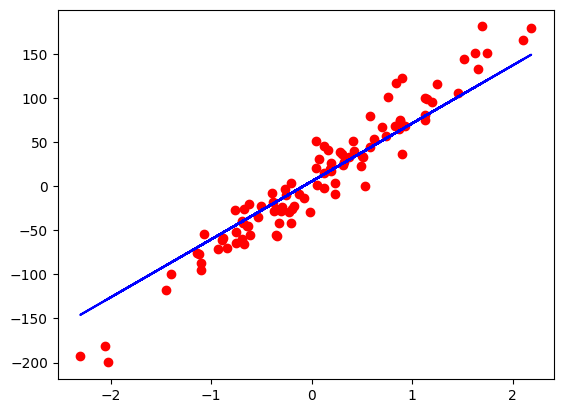

In [11]:
# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, "ro")
plt.plot(X_numpy, predicted, "b")
plt.show()